In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy 

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install keras

     ---------------------------------------- 1.7/1.7 MB 511.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tensorflow


     -------------------------------------- 272.8/272.8 MB 2.5 MB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 891.1 kB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     -------------------------------------- 420.6/420.6 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 440.7/440.7 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 2.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (

In [1]:
# import necessary packages
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import keras as ks

In [32]:
# read in churn dataset
df = pd.read_csv(r'C:\Users\mreed\OneDrive - CAPTECH VENTURES INC\MLExplorers\Datasets\ChurnDataset\Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [33]:
# Remove RowNumber, CustomerId, Surname
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [47]:
features = df.drop(['Exited'], axis=1)
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [66]:
# set the response (Y) to the Exited column
Y = df['Exited']
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [15]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [16]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [18]:
encode = df.filter(["Geography","Gender"], axis=1)
encode

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [25]:
# Use OneHotEncoder from sklearn for gender and geography
from sklearn.preprocessing import OneHotEncoder

# create an encoder and fit the dataframe
enc = OneHotEncoder(sparse=False).fit(encode)
encoded = enc.transform(encode)

# convert it to a dataframe
encoded_df = pd.DataFrame(
     encoded, 
     columns=enc.get_feature_names_out()
)
encoded_df.head()

C:\Users\mreed\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0


In [48]:
# add the encoded categorical variables to the dataframe and drop the original Geography and Gender columns
features = pd.concat([features, encoded_df], axis=1)
features = features.drop(["Geography","Gender"], axis=1)
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1.0,0.0,0.0,1.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0,0.0,1.0


In [57]:
# scale the numeric columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# numeric columns to be scaled:
ft_scale = features.filter(["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"], axis= 1)

# scale the columns with StandardScaler
sc = scaler.fit(ft_scale)
features_sc = sc.transform(ft_scale)

# convert it to a dataframe
features_scdf = pd.DataFrame(
     features_sc, 
     columns=sc.get_feature_names_out()
)
features_scdf.head()

In [65]:
# create the final features dataframe (X) with the scaled numeric values, binary columns and encoded columns
features1 = features.filter(["HasCrCard","IsActiveMember"], axis=1)
X = pd.concat([features_scdf, features1, encoded_df], axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,1,1,1.0,0.0,0.0,1.0,0.0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,0,1,0.0,0.0,1.0,1.0,0.0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,1,0,1.0,0.0,0.0,1.0,0.0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,0,0,1.0,0.0,0.0,1.0,0.0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,1,1,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,-0.066419,1,0,1.0,0.0,0.0,0.0,1.0
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.027988,1,1,1.0,0.0,0.0,0.0,1.0
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.008643,0,1,1.0,0.0,0.0,1.0,0.0
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,-0.125231,1,0,0.0,1.0,0.0,0.0,1.0


In [69]:
# split the data into train and test with 20% test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                   random_state=104, 
                                   test_size=0.2, 
                                   shuffle=True)
  
# printing out train and test sets
  
print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
      CreditScore       Age    Tenure   Balance  NumOfProducts  \
9919     0.387706 -1.232140 -1.733315 -1.225848       0.807737   
7994    -1.360899 -1.708908 -1.387538  1.205488       2.527057   
3564     2.032843  1.151700 -0.004426  0.337849      -0.911583   
6734    -0.326221  1.533114 -1.733315 -1.225848       2.527057   
1588     0.998166  2.105236  0.687130  1.273951      -0.911583   

      EstimatedSalary  HasCrCard  IsActiveMember  Geography_France  \
9919         0.099024          1               0               1.0   
7994         1.218072          1               1               0.0   
3564         0.766747          0               0               1.0   
6734        -0.683033          0               0               1.0   
1588         0.825352          0               1               1.0   

      Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
9919                0.0              0.0            0.0          1.0  
7994                1.0      

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

In [52]:
# import necessary packages for neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

# build a three layer neural network
model = Sequential()
model.add(Dense(6, input_shape=(13,)))
model.add(Activation('sigmoid'))
model.add(Dense(6))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [70]:
# config the model with losses and metrics
model.compile(loss='binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [72]:
# train the model
model.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 2, validation_split  = 0.2)
model.summary()

Epoch 1/100
640/640 - 8s - loss: 0.4940 - accuracy: 0.7984 - val_loss: 0.4859 - val_accuracy: 0.7925 - 8s/epoch - 12ms/step
Epoch 2/100
640/640 - 3s - loss: 0.4606 - accuracy: 0.7984 - val_loss: 0.4598 - val_accuracy: 0.7925 - 3s/epoch - 4ms/step
Epoch 3/100
640/640 - 3s - loss: 0.4366 - accuracy: 0.7984 - val_loss: 0.4438 - val_accuracy: 0.7925 - 3s/epoch - 4ms/step
Epoch 4/100
640/640 - 2s - loss: 0.4258 - accuracy: 0.7986 - val_loss: 0.4394 - val_accuracy: 0.7937 - 2s/epoch - 4ms/step
Epoch 5/100
640/640 - 3s - loss: 0.4224 - accuracy: 0.7981 - val_loss: 0.4383 - val_accuracy: 0.8025 - 3s/epoch - 4ms/step
Epoch 6/100
640/640 - 2s - loss: 0.4210 - accuracy: 0.8011 - val_loss: 0.4372 - val_accuracy: 0.8037 - 2s/epoch - 4ms/step
Epoch 7/100
640/640 - 2s - loss: 0.4201 - accuracy: 0.8069 - val_loss: 0.4371 - val_accuracy: 0.8069 - 2s/epoch - 3ms/step
Epoch 8/100
640/640 - 2s - loss: 0.4189 - accuracy: 0.8102 - val_loss: 0.4405 - val_accuracy: 0.8075 - 2s/epoch - 4ms/step
Epoch 9/100
640

Epoch 68/100
640/640 - 2s - loss: 0.3877 - accuracy: 0.8380 - val_loss: 0.4159 - val_accuracy: 0.8313 - 2s/epoch - 3ms/step
Epoch 69/100
640/640 - 3s - loss: 0.3878 - accuracy: 0.8375 - val_loss: 0.4152 - val_accuracy: 0.8300 - 3s/epoch - 4ms/step
Epoch 70/100
640/640 - 3s - loss: 0.3879 - accuracy: 0.8384 - val_loss: 0.4136 - val_accuracy: 0.8313 - 3s/epoch - 4ms/step
Epoch 71/100
640/640 - 3s - loss: 0.3876 - accuracy: 0.8388 - val_loss: 0.4158 - val_accuracy: 0.8319 - 3s/epoch - 5ms/step
Epoch 72/100
640/640 - 3s - loss: 0.3875 - accuracy: 0.8397 - val_loss: 0.4130 - val_accuracy: 0.8319 - 3s/epoch - 5ms/step
Epoch 73/100
640/640 - 2s - loss: 0.3875 - accuracy: 0.8397 - val_loss: 0.4148 - val_accuracy: 0.8306 - 2s/epoch - 4ms/step
Epoch 74/100
640/640 - 2s - loss: 0.3873 - accuracy: 0.8392 - val_loss: 0.4139 - val_accuracy: 0.8313 - 2s/epoch - 3ms/step
Epoch 75/100
640/640 - 2s - loss: 0.3869 - accuracy: 0.8372 - val_loss: 0.4154 - val_accuracy: 0.8313 - 2s/epoch - 3ms/step
Epoch 76

63/63 [==============================] - 0s 5ms/step


<Axes: >

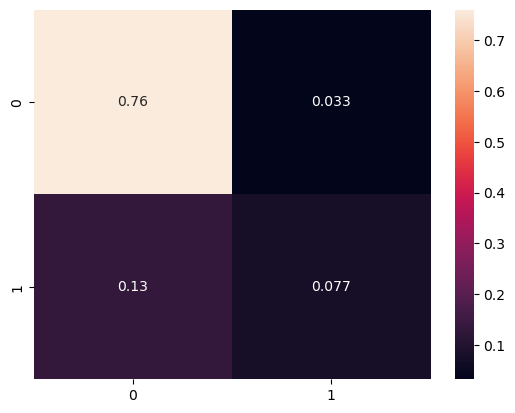

In [75]:
# use the model to do prediction and plot it with a confusion matrix
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)
conf_matrix = sk.metrics.confusion_matrix(y_test.values, y_pred)
sns.heatmap(conf_matrix/np.sum(conf_matrix),annot = True)